# <a name="0">Hierarchical Clustering</a>

1. <a href="#0">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
5. <a href="#5">K means</a>
6. <a href="#5">Training datasets</a>
7. <a href="#6">Improvement ideas</a>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data
then import it in python.

In [2]:
#read the data

data_path = './CC GENERAL.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [3]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [5]:
# This will print basic statistics for numerical columns
df.describe()
# count the balance between 0 to 2500
df["BALANCE"].loc[(df["BALANCE"] > 0) & (df["BALANCE"] <= 2500)].count()

7021

In [6]:
# check for duplicate rows
duplicate_rows = df.duplicated()
print('Number of duplicate rows = %d' % (duplicate_rows.sum()))

Number of duplicate rows = 0


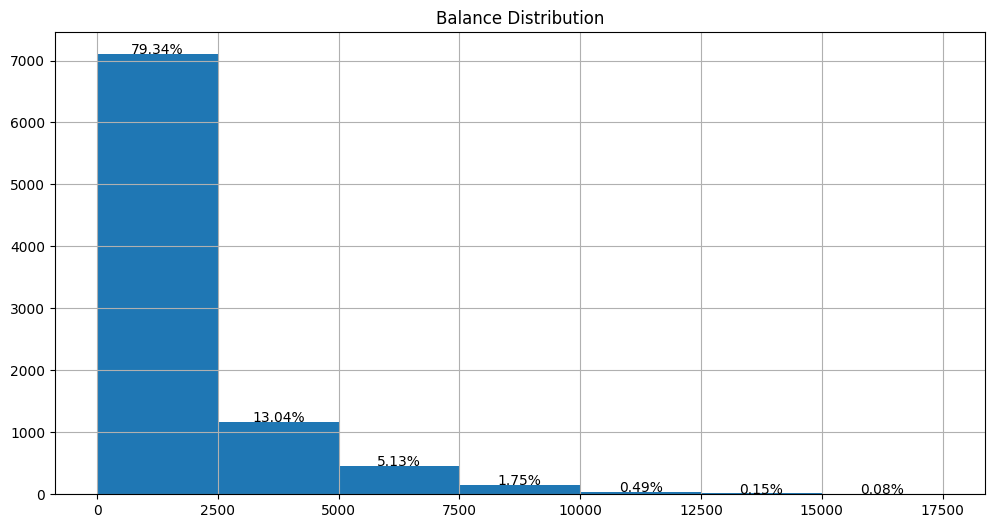

In [7]:
# plot the balance distribution
bins = [0, 2500, 5000, 7500, 10000, 12500, 15000, 17500]
plt.figure(figsize=(12,6))
plt.title('Balance Distribution')
df['BALANCE'].hist(bins=bins)
for i in range(0, 17500, 2500):
    count = df[df['BALANCE'].between(i, i+2500)]['BALANCE'].count()
    percent = count*100/df.shape[0]
    plt.text(i+1250, count, f'{percent:.2f}%', ha='center')
plt.show()

#### Most of the customers have a balance between 0 and 2500 (~80%).

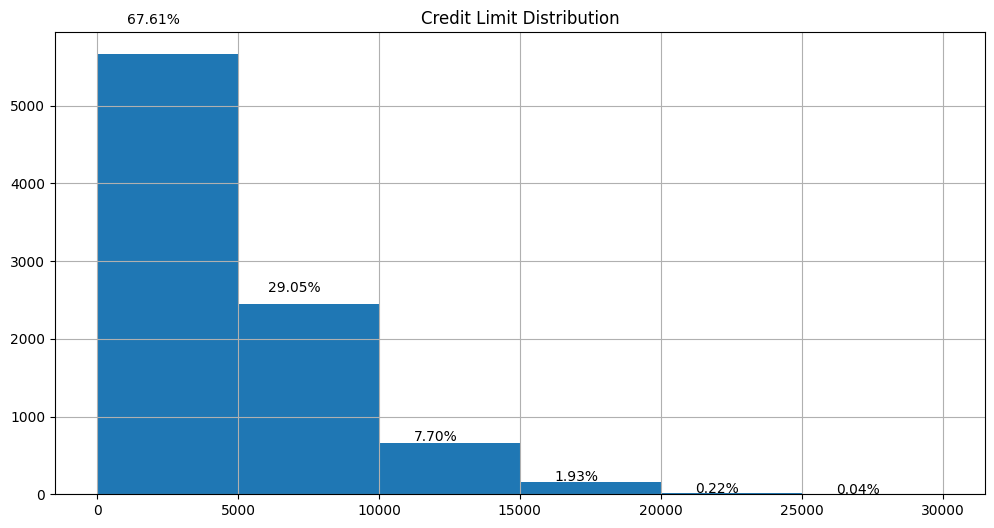

In [8]:
# plot the credit limit distribution
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000]
plt.figure(figsize=(12,6))
plt.title('Credit Limit Distribution')
df['CREDIT_LIMIT'].hist(bins=bins)
for i in range(0, 30000, 5000):
    count = df[df['CREDIT_LIMIT'].between(i, i+5000)]['CREDIT_LIMIT'].count()
    percent = count*100/df.shape[0]
    plt.text(i+2000, count, f'{percent:.2f}%', ha='center')
plt.show()

#### Most of the customers have a credit limit between 0 and 5000 (~68%).

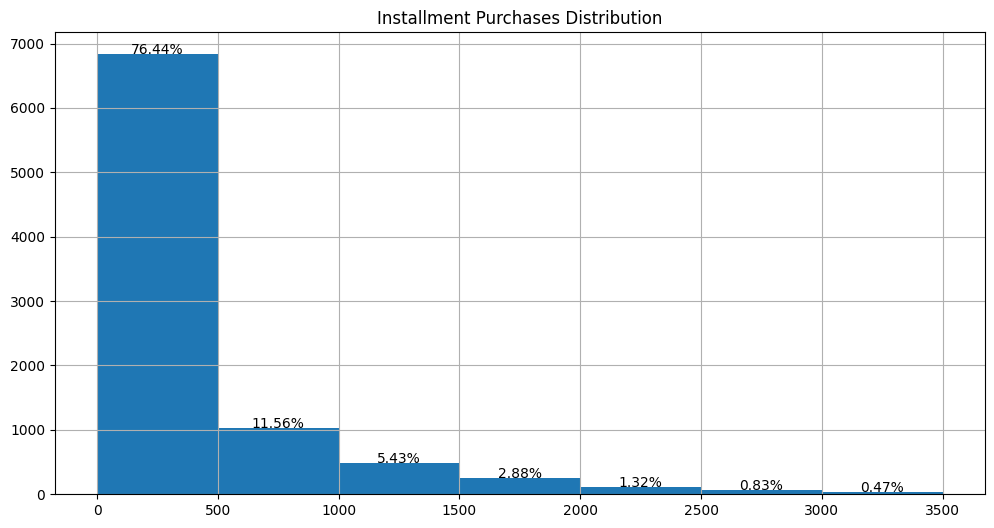

In [9]:
# plot the installment purchases distribution

bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500]

plt.figure(figsize=(12,6))
plt.title('Installment Purchases Distribution')

df['INSTALLMENTS_PURCHASES'].hist(bins=bins)

for i in range(0, 3500, 500):
    count = df[df['INSTALLMENTS_PURCHASES'].between(i, i+500)]['INSTALLMENTS_PURCHASES'].count()
    percent = count*100/df.shape[0]
    plt.text(i+250, count, f'{percent:.2f}%', ha='center')

plt.show()

#### Most of the customers made installment purchases between 0 and 500 (~76%).

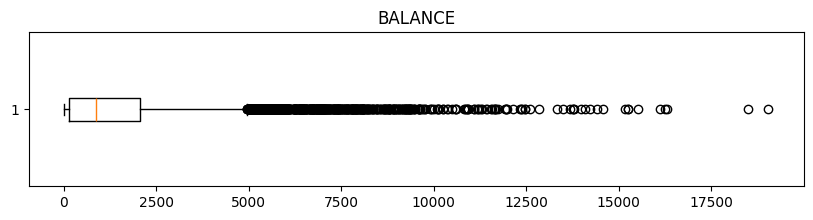

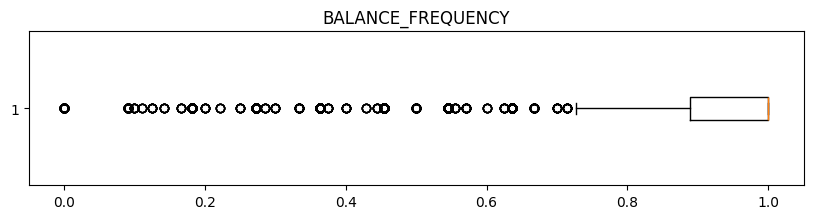

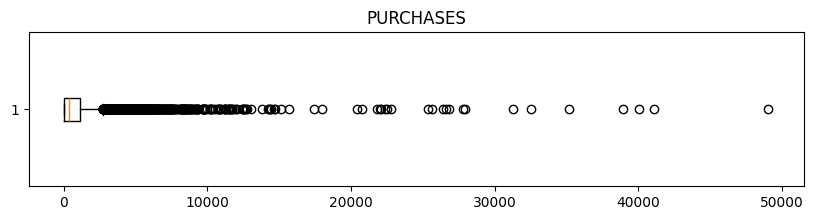

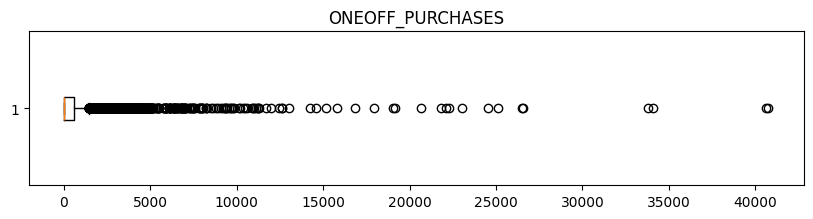

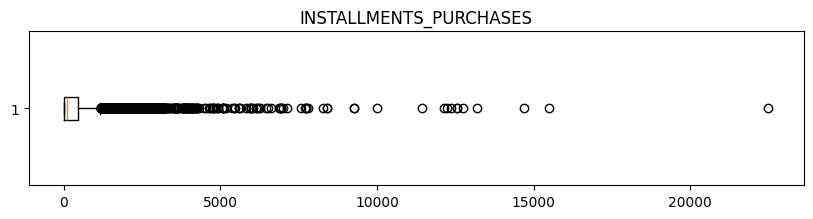

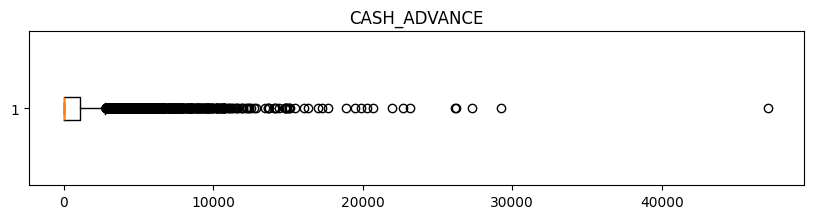

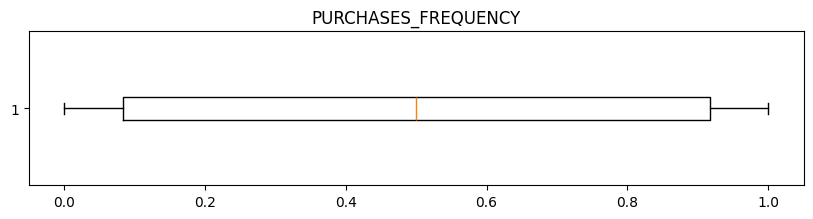

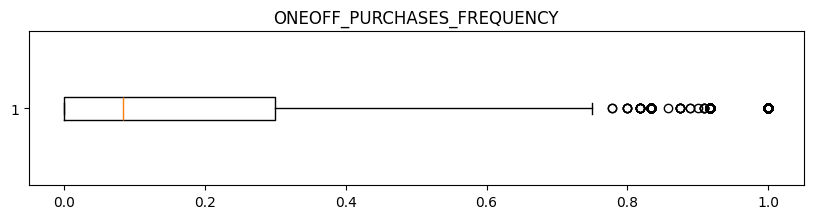

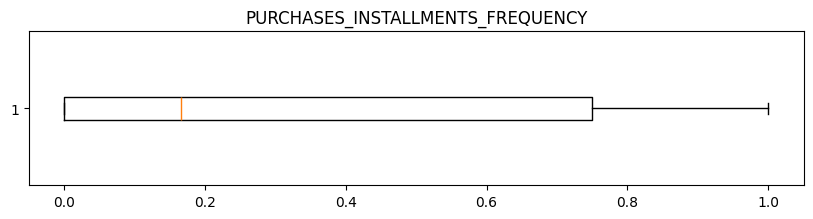

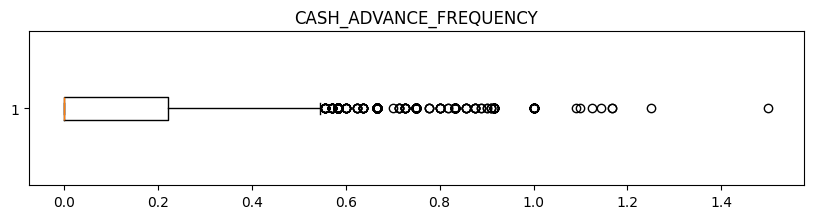

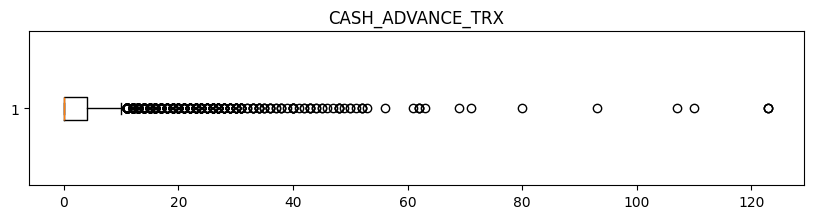

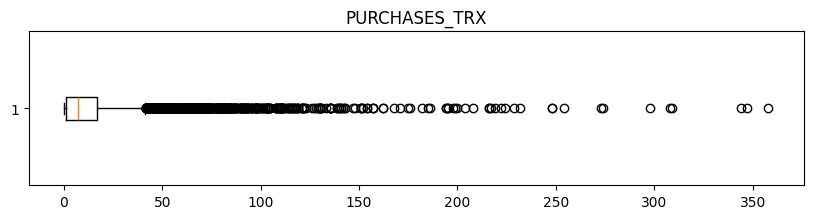

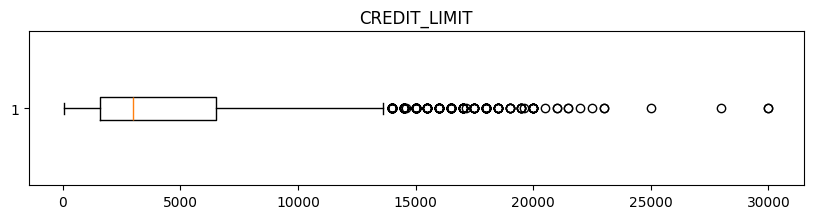

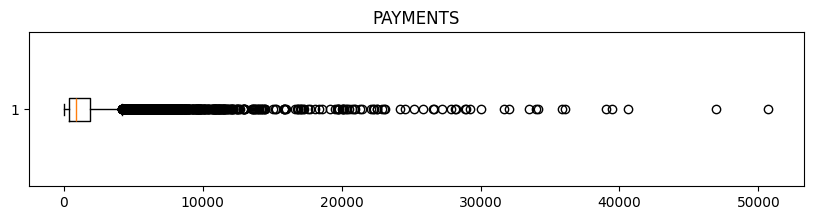

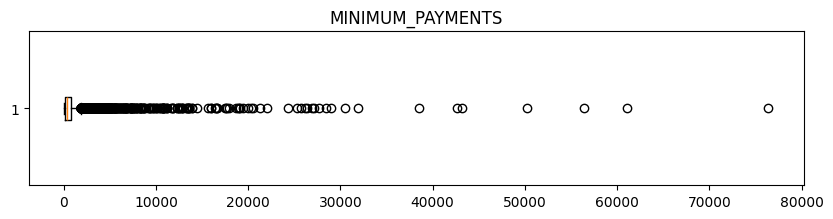

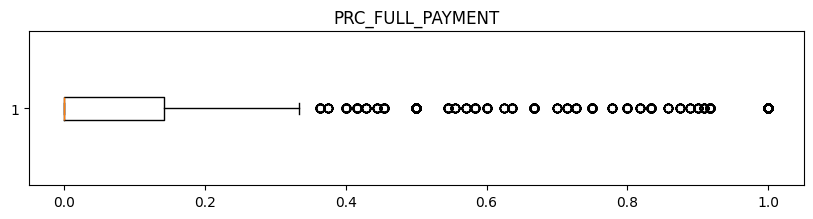

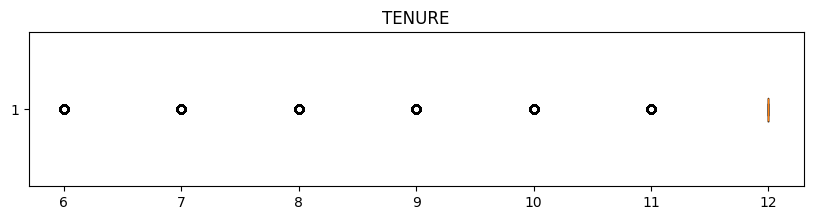

In [10]:
# outliers using boxplot
for col in df.columns[1:]:
    plt.figure(figsize=(10,2))
    plt.title(col)
    plt.boxplot(df[col].dropna(), vert=False)
    plt.show()


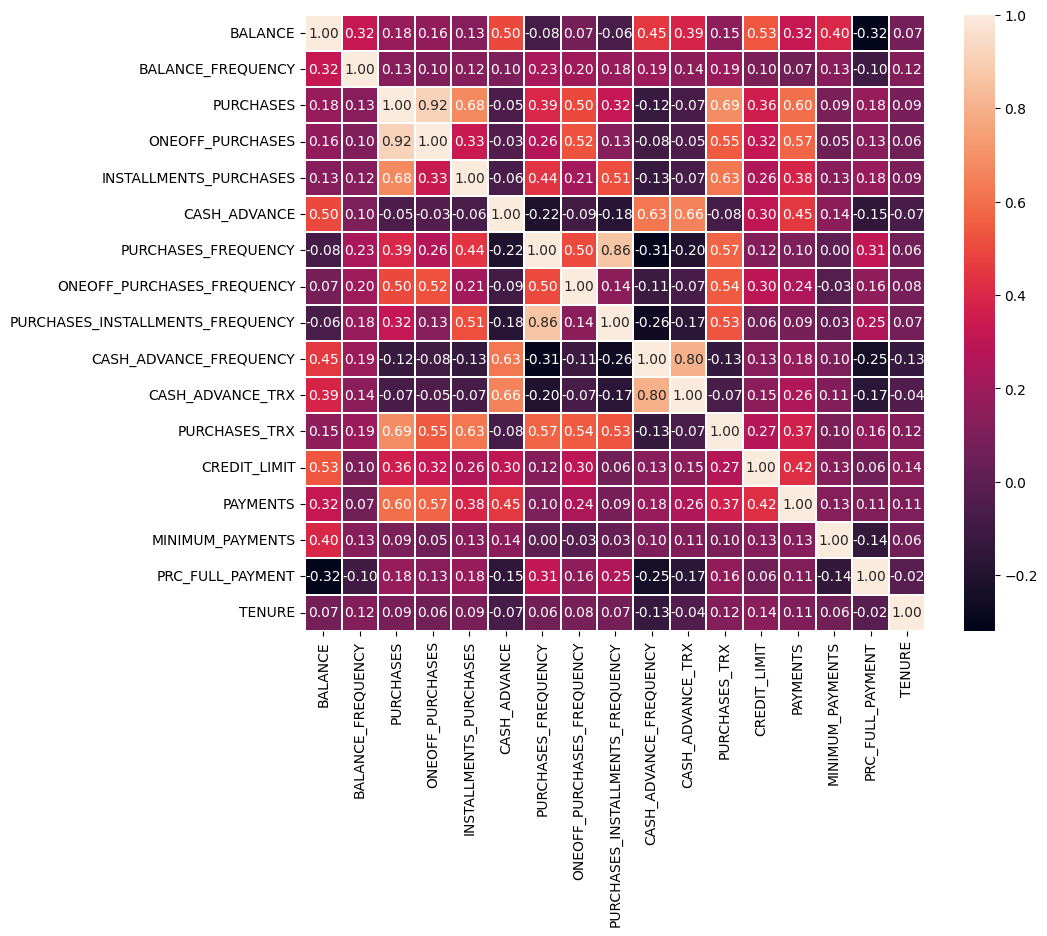

In [11]:
correlation = df.drop('CUST_ID', axis=1).corr()
threshold = 0.4 
corr_filtered = correlation[((correlation > threshold) & (correlation < 1)) | (correlation < -threshold)]
# Plot heatmap
plt.figure(figsize=(10, 8))
# plt.title('Correlation Heatmap (Threshold > 0.4) or (Threshold < -0.4)')
sns.heatmap(correlation, annot=True,fmt='.2f',linewidths=0.3)
plt.show()

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- There are some columns that contains nulls          <br>
2- There is no need for "CUST_ID" column          <br>
3- There are liner relationship between some columns          <br>
4- Most of the columns are highly skewed         <br>

In [12]:
#make a copy for the original dataset

df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

In [13]:
#solution
df_copy.fillna(df_copy.drop('CUST_ID', axis=1).mean(), inplace=True)

In [14]:
#test 
round(df_copy.isnull().sum(axis=0)*100/df_copy.shape[0],2)

CUST_ID                             0.0
BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

**Second issue**

In [15]:
# solution
# We will drop the CUST_ID column because it is not useful for clustering.

df_copy.drop('CUST_ID', axis=1, inplace=True)

In [16]:
#test
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

**Third issue**

In [17]:
# solution
dropped_columns = ['PURCHASES_INSTALLMENTS_FREQUENCY','ONEOFF_PURCHASES', 'CASH_ADVANCE_FREQUENCY']

df_copy.drop(dropped_columns, axis=1, inplace=True)

In [18]:
# test
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   BALANCE                     8950 non-null   float64
 1   BALANCE_FREQUENCY           8950 non-null   float64
 2   PURCHASES                   8950 non-null   float64
 3   INSTALLMENTS_PURCHASES      8950 non-null   float64
 4   CASH_ADVANCE                8950 non-null   float64
 5   PURCHASES_FREQUENCY         8950 non-null   float64
 6   ONEOFF_PURCHASES_FREQUENCY  8950 non-null   float64
 7   CASH_ADVANCE_TRX            8950 non-null   int64  
 8   PURCHASES_TRX               8950 non-null   int64  
 9   CREDIT_LIMIT                8950 non-null   float64
 10  PAYMENTS                    8950 non-null   float64
 11  MINIMUM_PAYMENTS            8950 non-null   float64
 12  PRC_FULL_PAYMENT            8950 non-null   float64
 13  TENURE                      8950 

**Third issue** <br>
this issue can be solved by using the log transformation for the columns that are skewed

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

Answer here:

In [19]:
from sklearn import preprocessing
from sklearn.manifold import TSNE

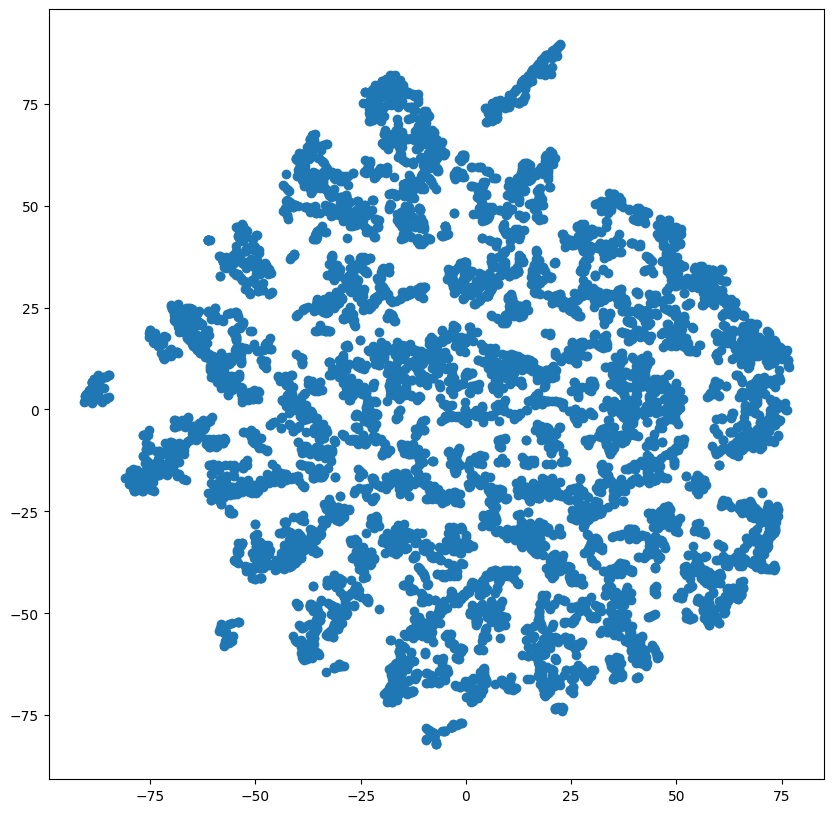

In [20]:
def draw_clusters(data, colors=None):
    tsne = TSNE(n_components=2, random_state=42)
    tsne_data = tsne.fit_transform(data)

    plt.figure(figsize=(10, 10))
    plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=colors)
    plt.show()

draw_clusters(df_copy)


#### log transformation

In [21]:
data_normalized_log = np.log(df_copy + 1)
data_normalized_log.skew()

BALANCE                      -0.861021
BALANCE_FREQUENCY            -2.285534
PURCHASES                    -0.764492
INSTALLMENTS_PURCHASES       -0.024981
CASH_ADVANCE                  0.262594
PURCHASES_FREQUENCY          -0.089637
ONEOFF_PURCHASES_FREQUENCY    1.290617
CASH_ADVANCE_TRX              0.940131
PURCHASES_TRX                 0.032697
CREDIT_LIMIT                 -0.101564
PAYMENTS                     -1.778312
MINIMUM_PAYMENTS              0.185762
PRC_FULL_PAYMENT              1.746046
TENURE                       -3.170222
dtype: float64

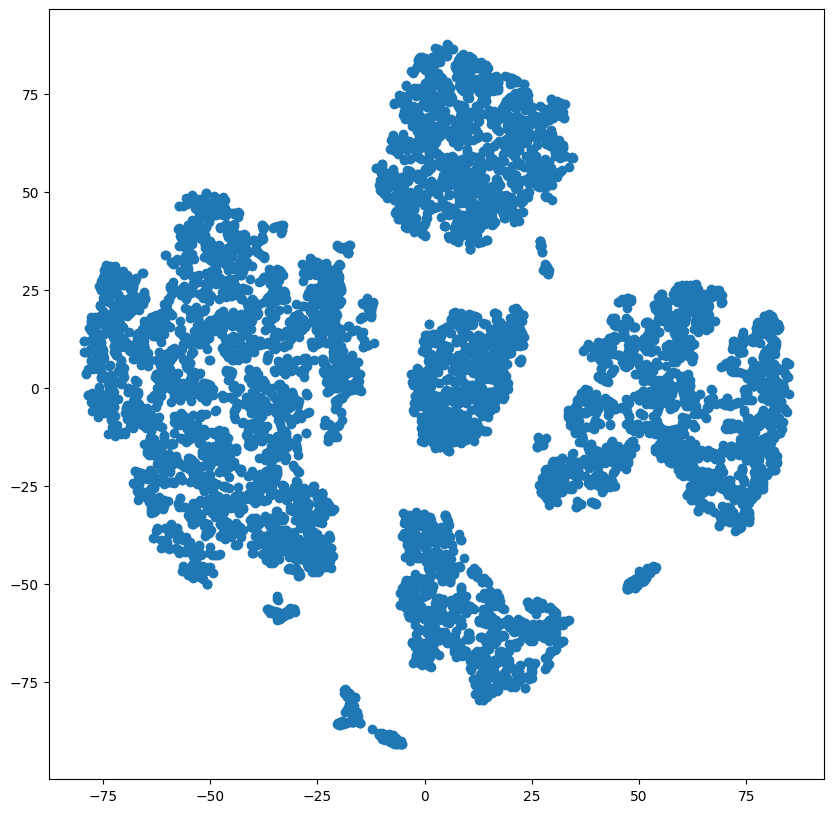

In [22]:
draw_clusters(data_normalized_log)

#### quantile transformation

In [23]:
quantile_scaler = preprocessing.QuantileTransformer()
data_normalized_quantile = quantile_scaler.fit_transform(df_copy)

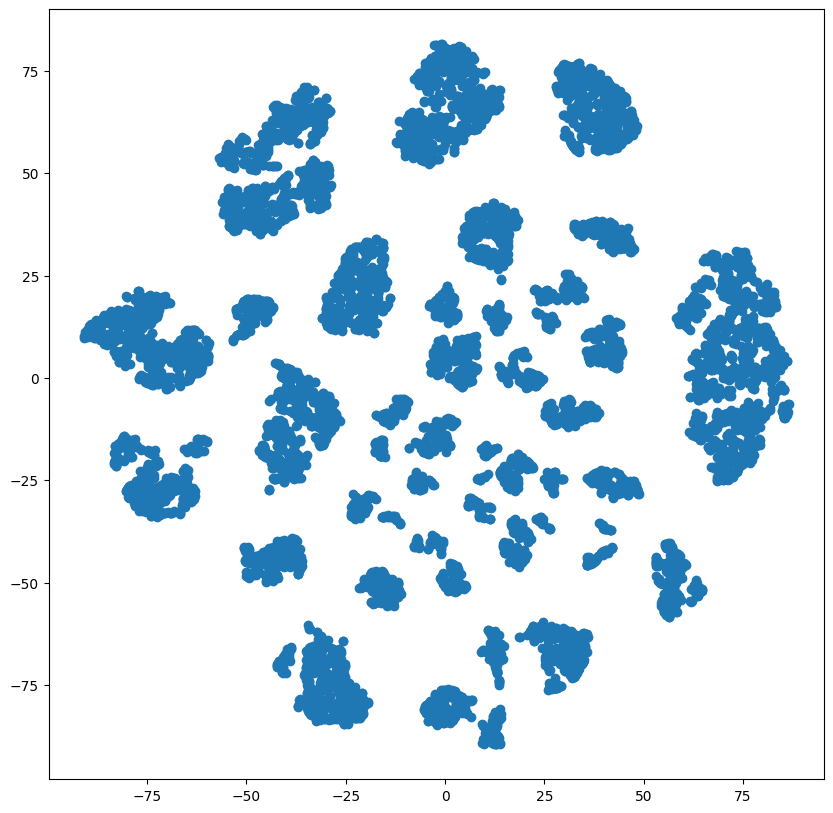

In [24]:
draw_clusters(data_normalized_quantile)

#### standard scaling

In [25]:
st_scaler = preprocessing.StandardScaler()
data_normalized_st = st_scaler.fit_transform(df_copy)

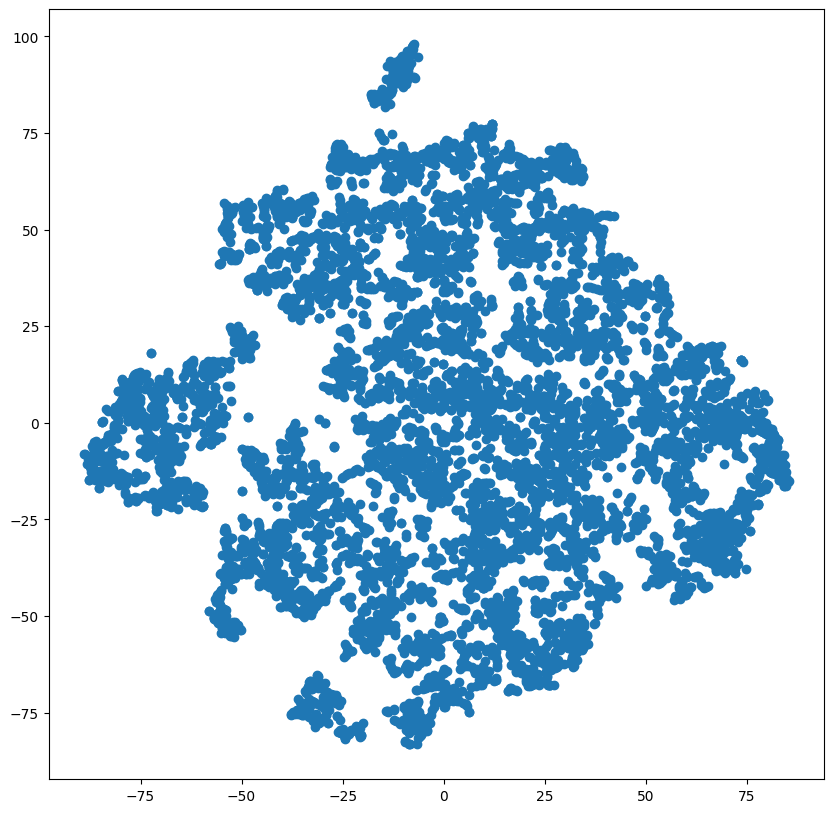

In [26]:
draw_clusters(data_normalized_st)

#### min-max scaling

In [27]:
minmax_scaler = preprocessing.MinMaxScaler()
data_normalized_minmax = minmax_scaler.fit_transform(df_copy)

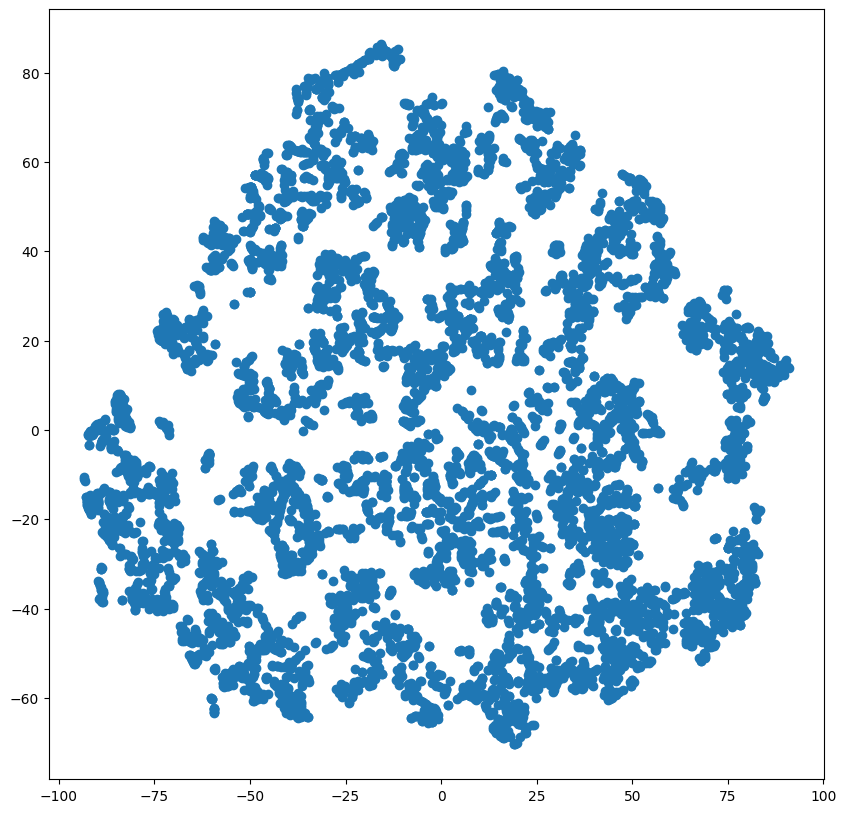

In [28]:
draw_clusters(data_normalized_minmax)

#### robust scaling

In [29]:
robust_scaler = preprocessing.RobustScaler()
data_normalized_robust = robust_scaler.fit_transform(df_copy)

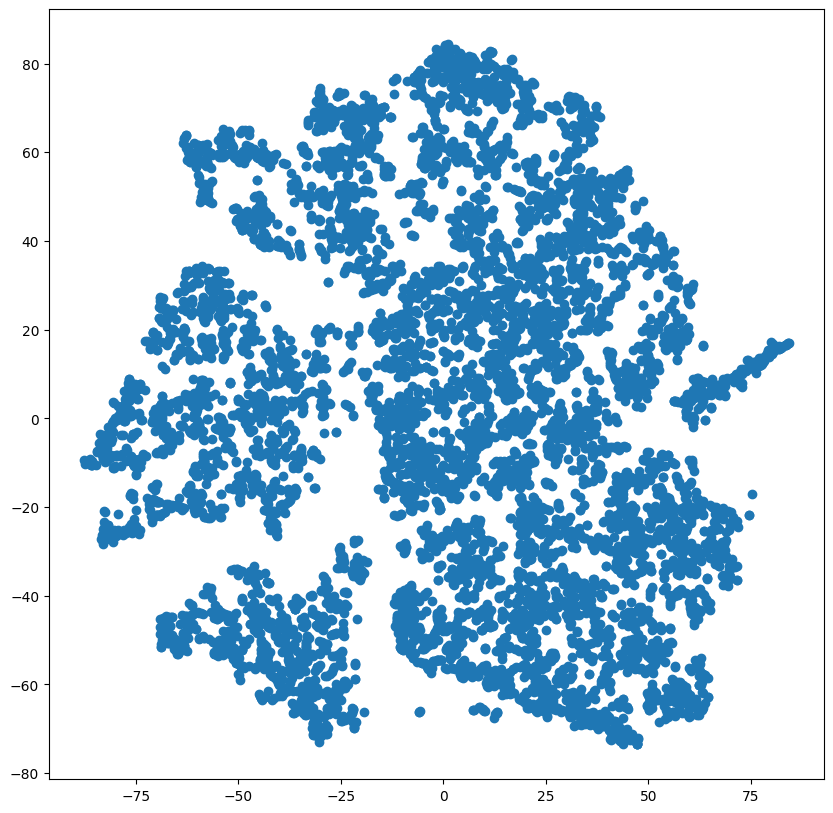

In [30]:
draw_clusters(data_normalized_robust)

#### kernel Pca

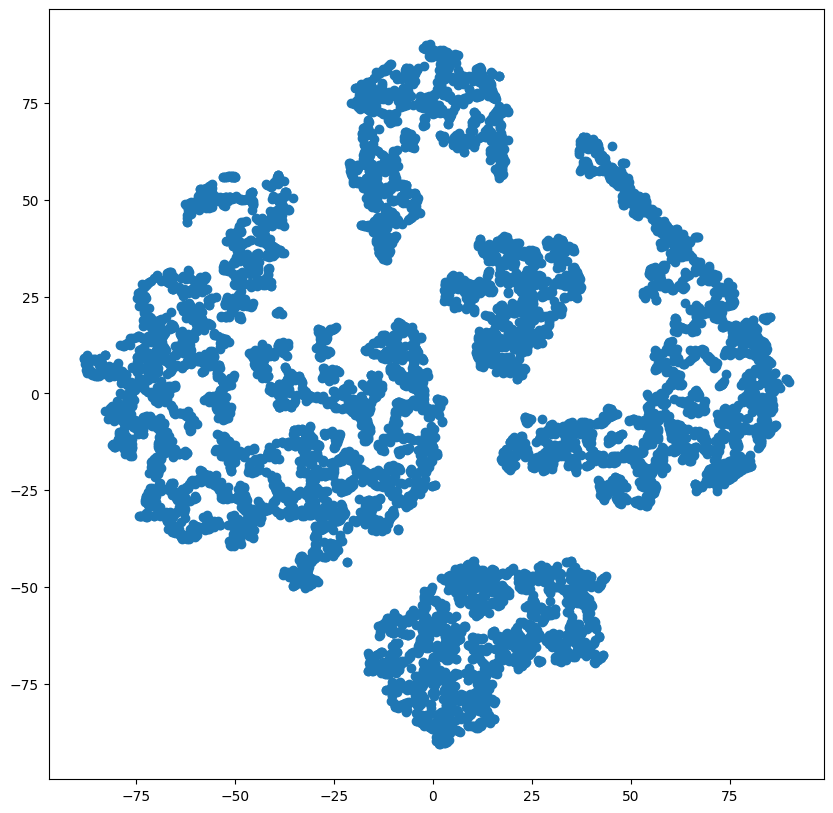

In [31]:
# apply kernel PCA
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=4, kernel='cosine')
data_kpca = kpca.fit_transform(data_normalized_log)

draw_clusters(data_kpca)

#### pca

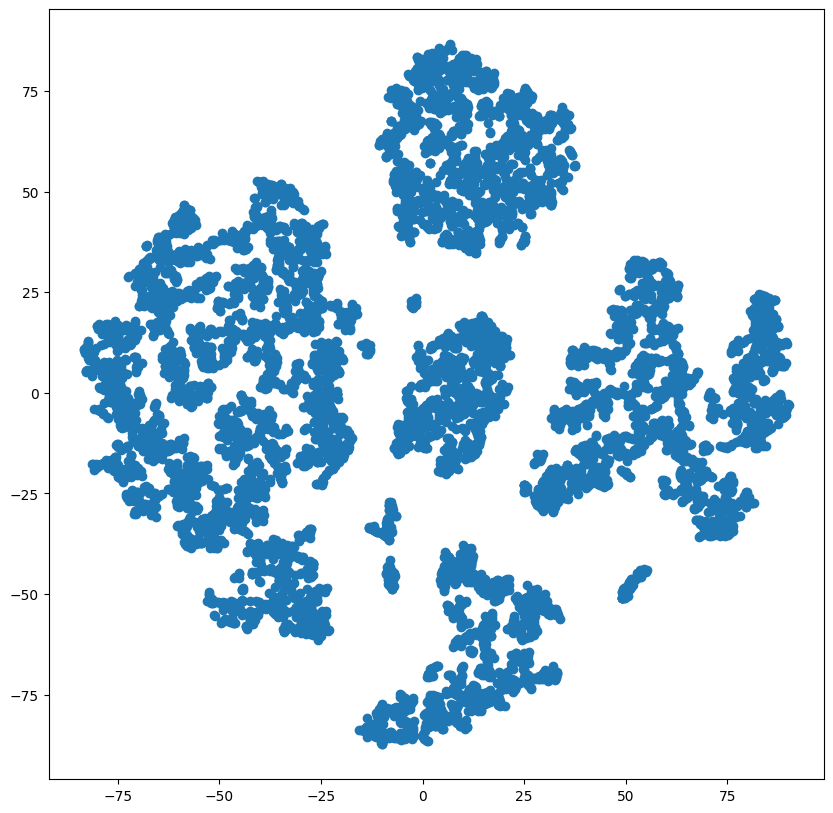

In [32]:
# apply pca
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

data_pca = pca.fit_transform(data_normalized_log)
draw_clusters(data_pca)

## 5. <a name="5">K Means</a>
(<a href="#5">Go to top</a>)

1- Use the k means class that you implemented in the previous task to cluster this data
2- Use http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html and see if the difference in the result
3- Use elbow method to determine the K (plot the result using two plot one for distorion and another for inertia)
4- (Optionally) make a method that pick the best number of clusters for you 
5- Using different techniques for scaling and comment on the result

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

distortions = []
wcss = []
sil_scores = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_normalized_log)
    wcss.append(kmeans.inertia_)
    distortions.append(sum(np.min(cdist(data_normalized_log, kmeans.cluster_centers_, 'euclidean'), axis=1)) / data_normalized_log.shape[0])
    if i > 1:
        sil_scores.append(silhouette_score(data_normalized_log, kmeans.labels_))

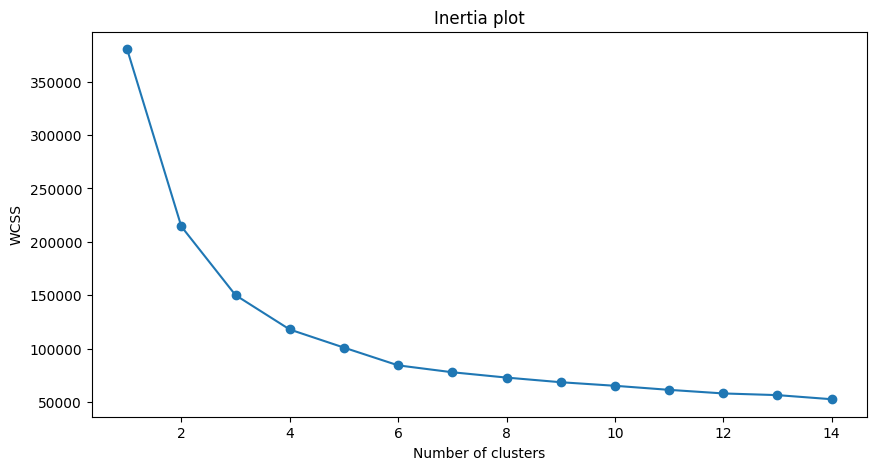

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 15), wcss, marker='o')
plt.title('Inertia plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

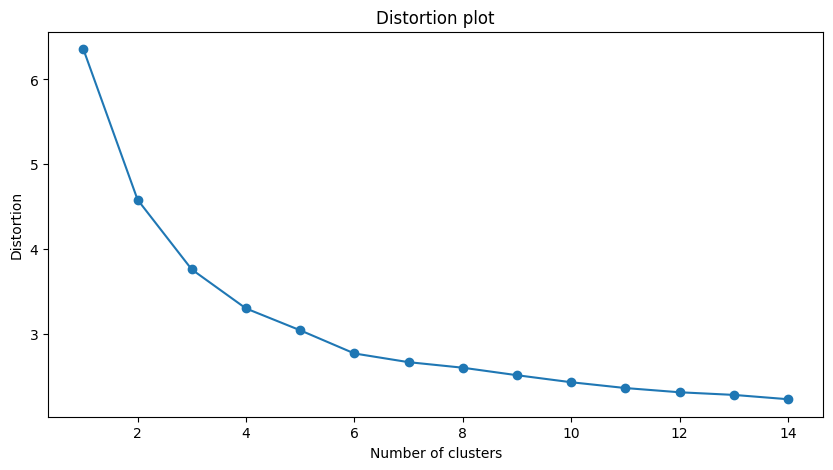

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 15), distortions, marker='o')
plt.title('Distortion plot')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

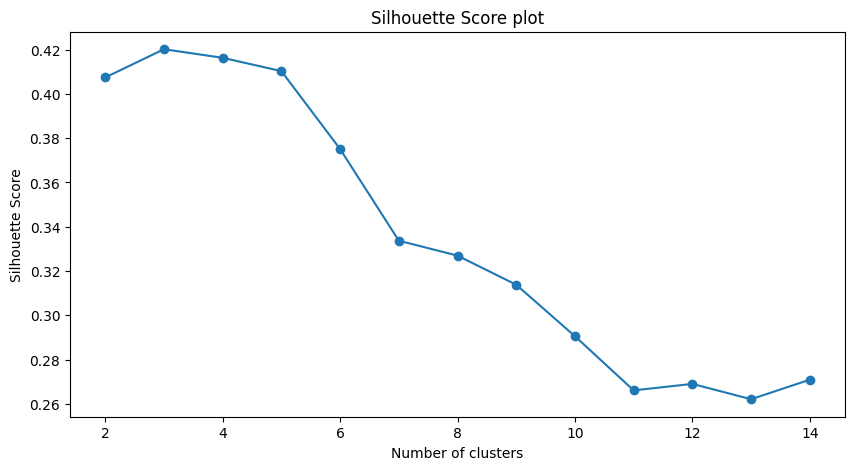

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 15), sil_scores, marker='o')
plt.title('Silhouette Score plot')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

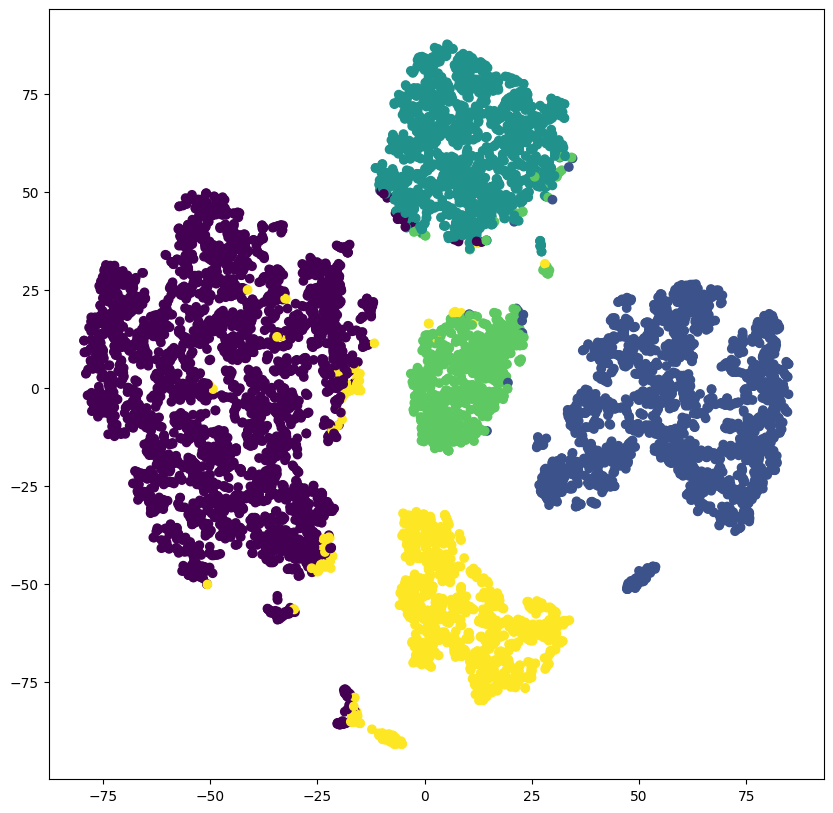

In [37]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5 , init='k-means++', random_state=42)
kmeans.fit(data_normalized_log)

draw_clusters(data_normalized_log, colors=kmeans.predict(data_normalized_log))


## 6. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

#### method = complete

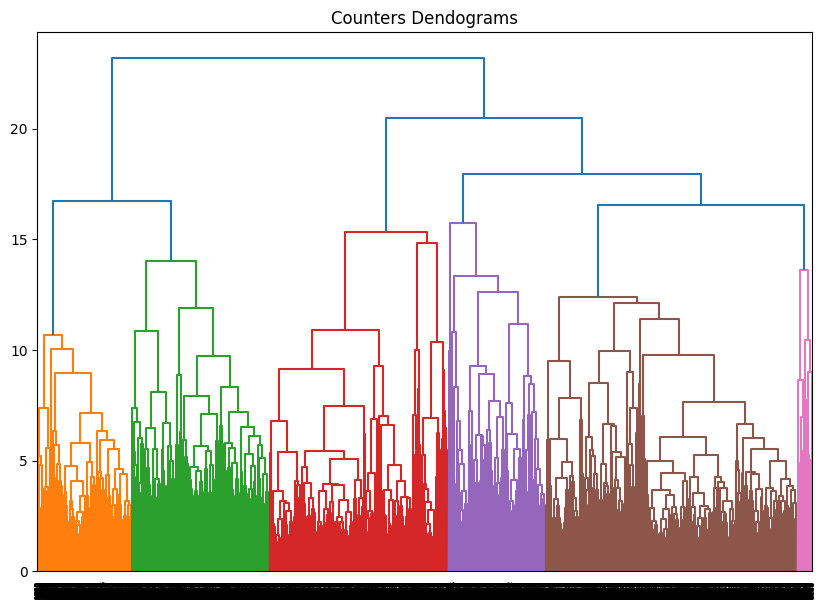

In [38]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=data_normalized_log, method='complete', metric='euclidean'))

#### method = single

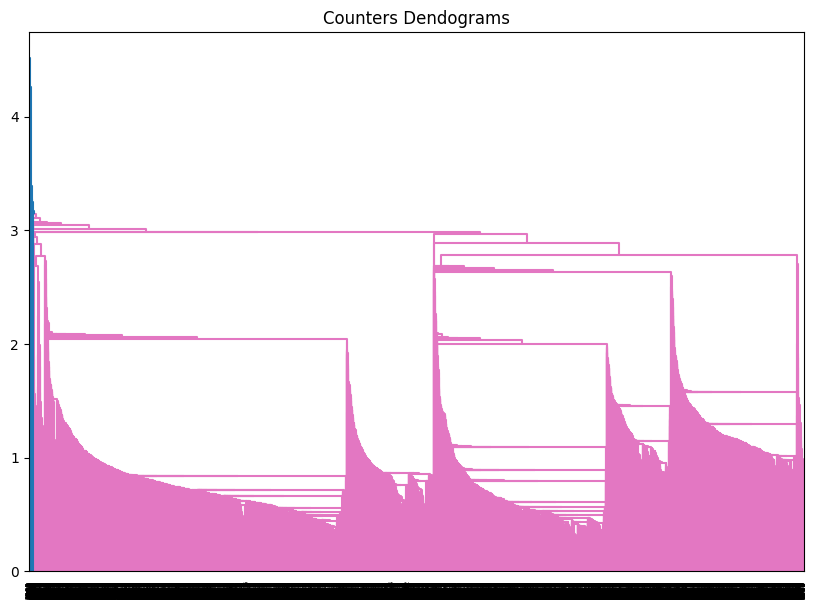

In [39]:
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=data_normalized_log, method='single', metric='euclidean'))

#### method = average

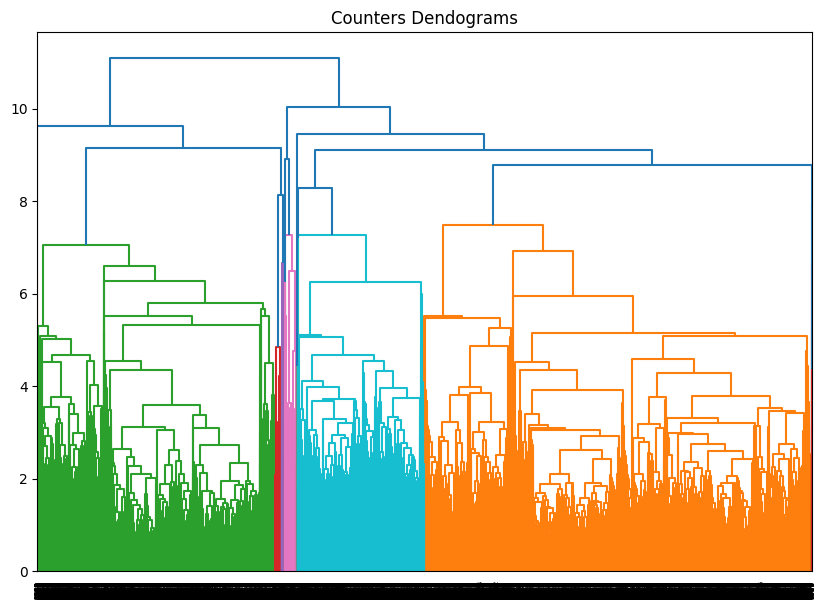

In [40]:
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=data_normalized_log, method='average', metric='euclidean'))

#### metric = mahalanobis

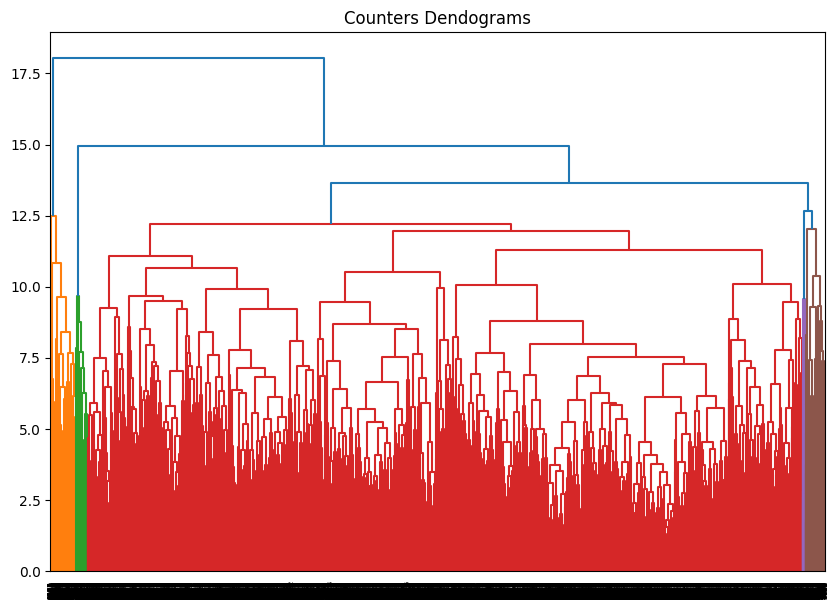

In [41]:
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=data_normalized_log, method='complete', metric='mahalanobis'))

### AgglomerativeClustering

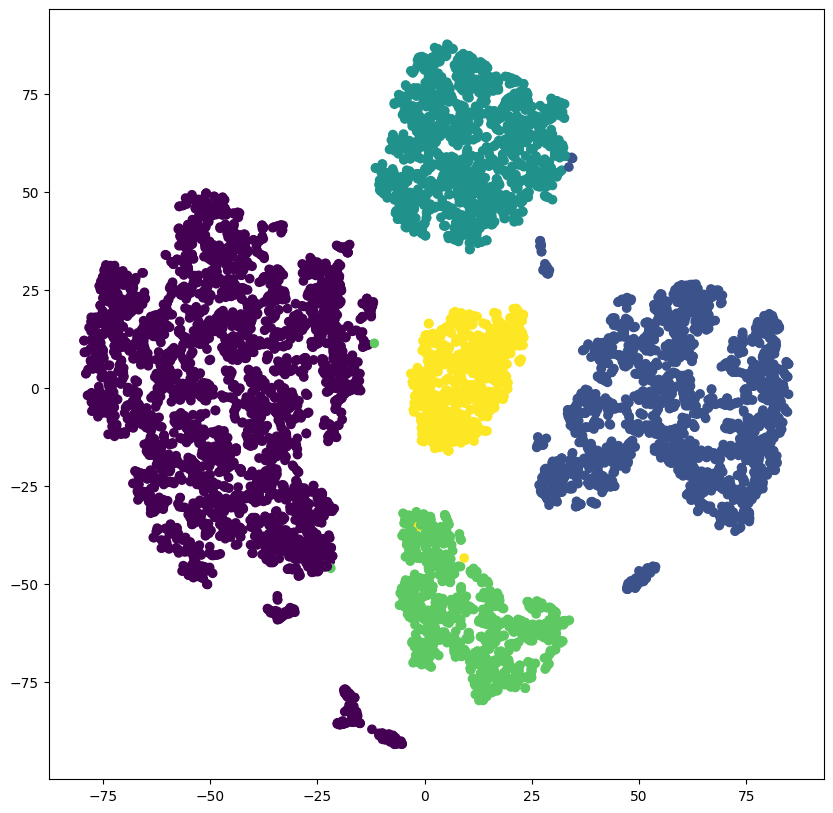

In [42]:
#training
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=5).fit(data_normalized_log)


draw_clusters(data_normalized_log, colors=agglo.labels_)



### DBSCAN

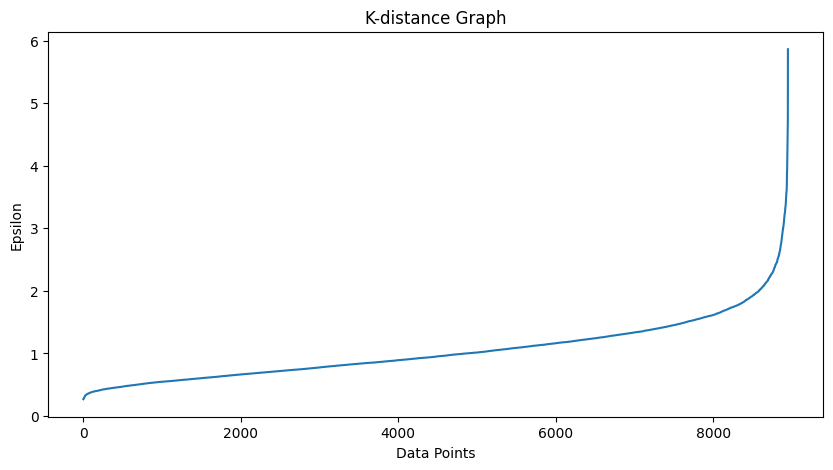

In [43]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(data_normalized_log)
distances, indices = knn.kneighbors(data_normalized_log)

distances = np.sort(distances, axis=0)
distances = distances[:,-1]

plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Data Points')
plt.ylabel('Epsilon')
plt.show()

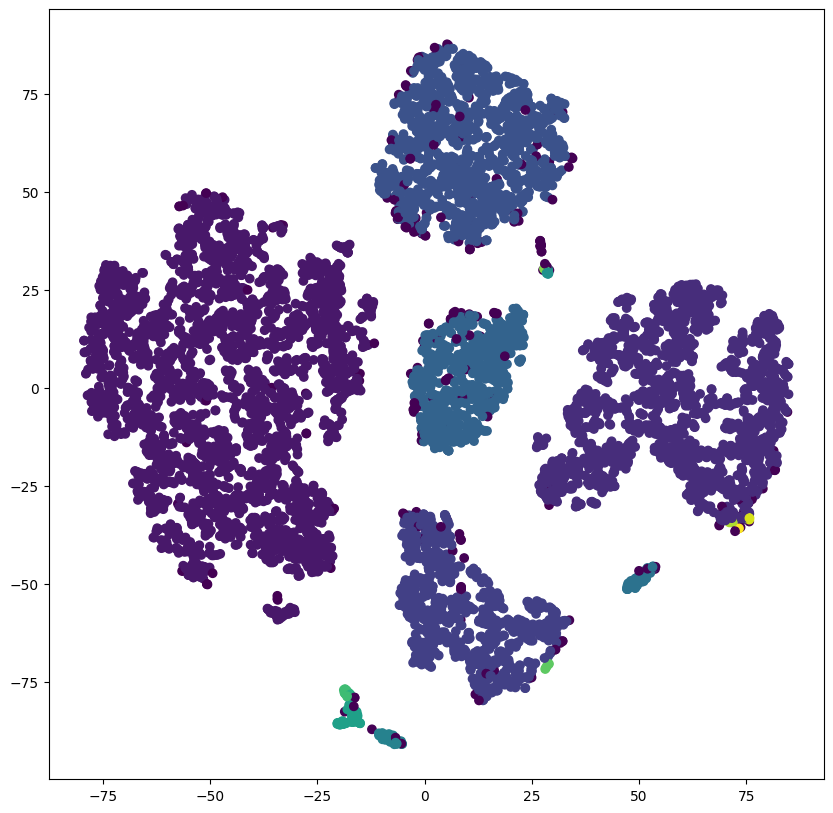

In [44]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.8, min_samples=int(np.log2(data_normalized_log.shape[1])))
dbscan.fit(data_normalized_log)

draw_clusters(data_normalized_log, colors=dbscan.labels_)

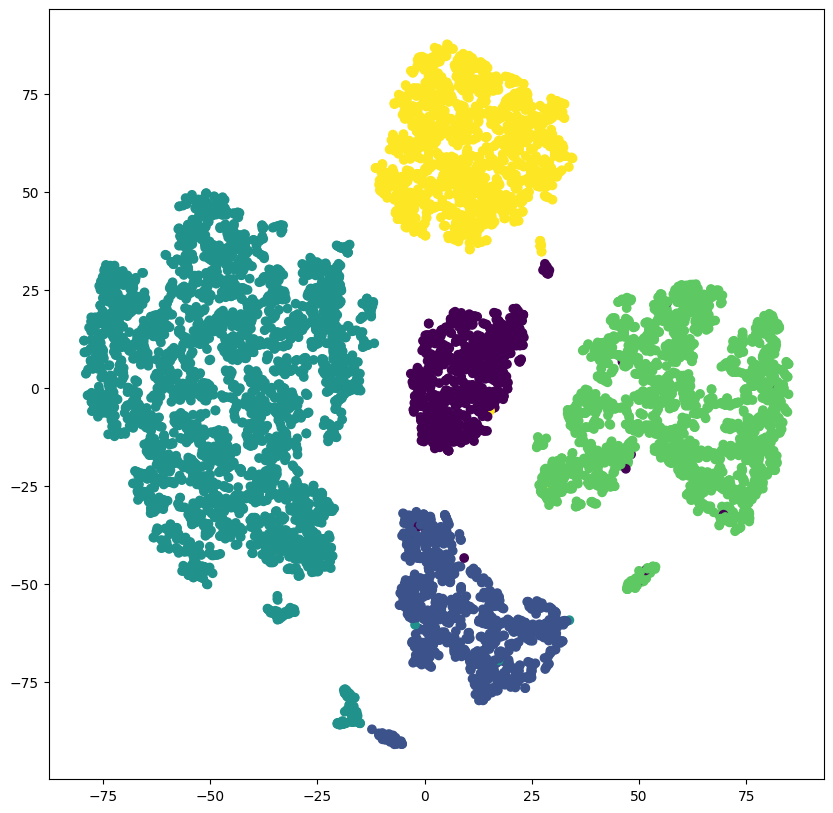

In [45]:
# apply EM algorithm
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(data_normalized_log)

draw_clusters(data_normalized_log, colors=gmm.predict(data_normalized_log))

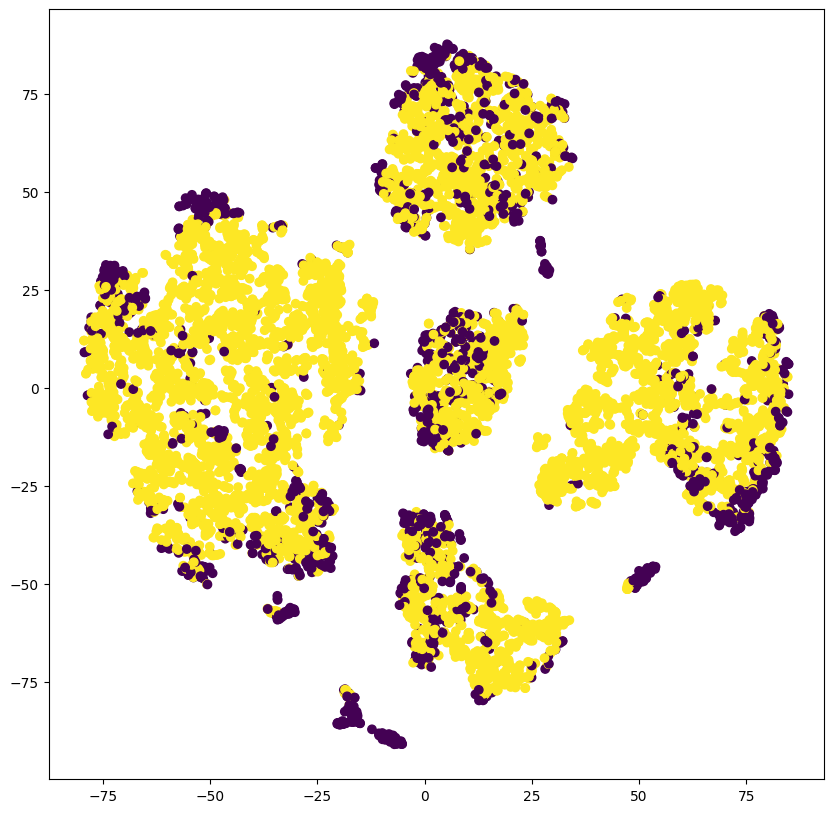

In [46]:
# apply isolation forest
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
isolation_forest.fit(data_normalized_log)

draw_clusters(data_normalized_log, colors=isolation_forest.predict(data_normalized_log))

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 

## 7. Conclusion

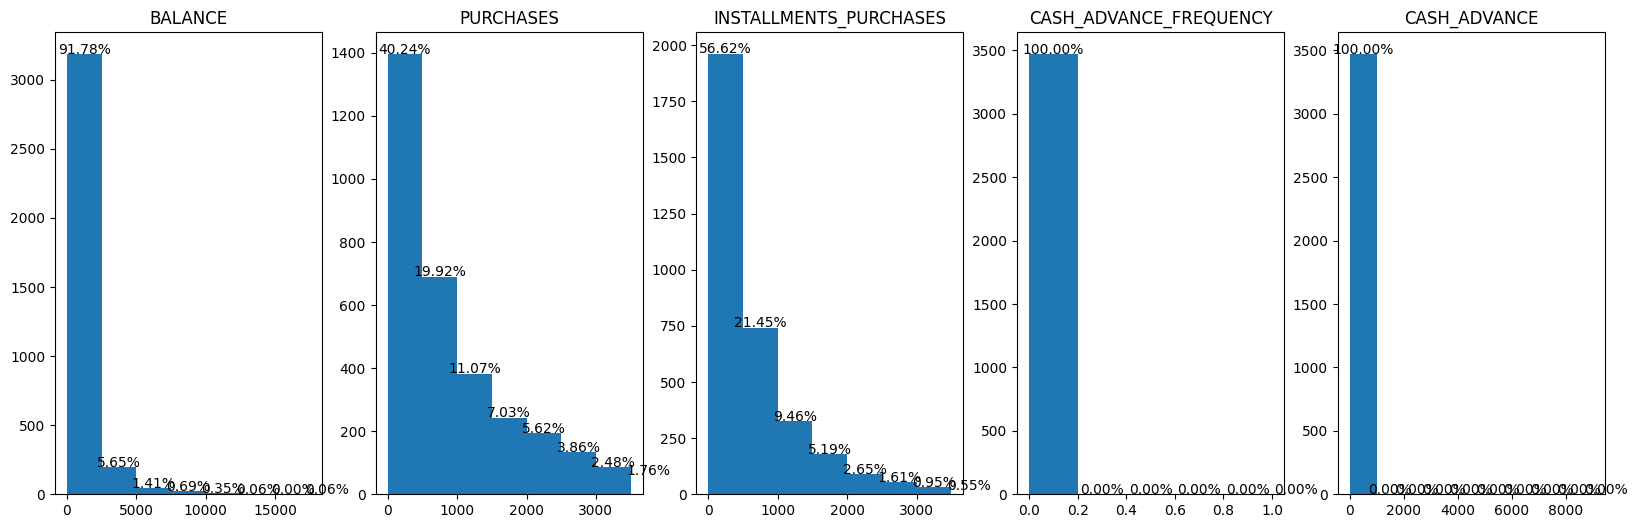

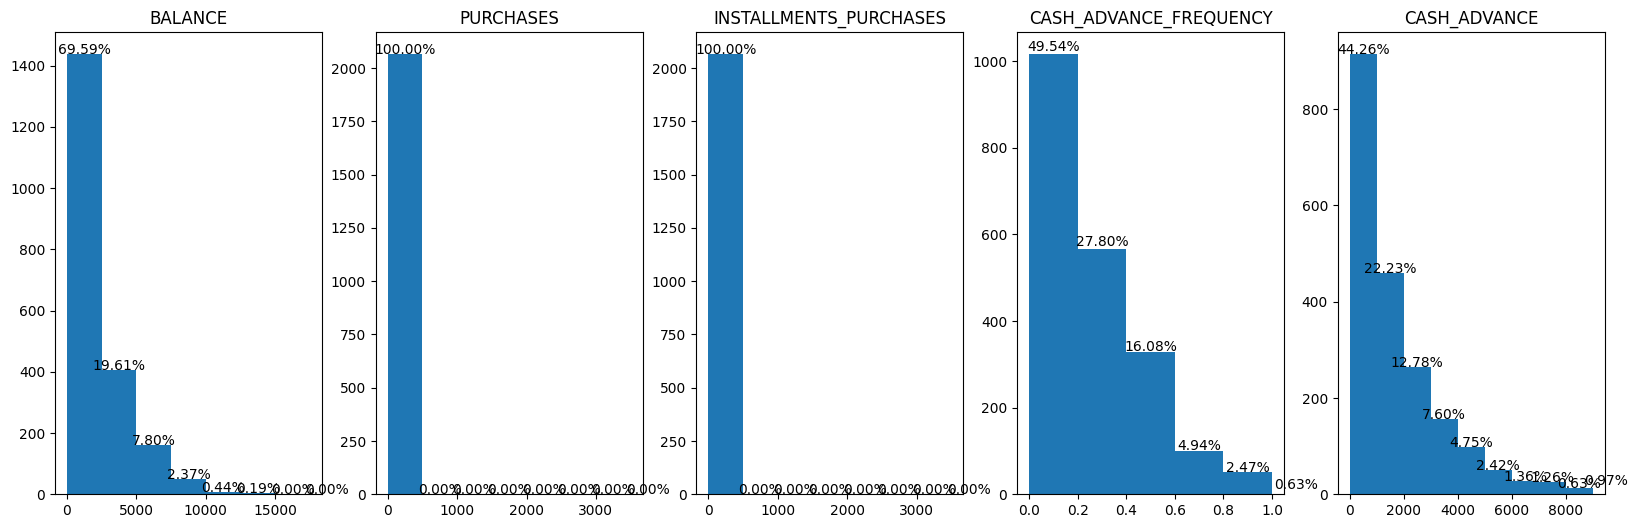

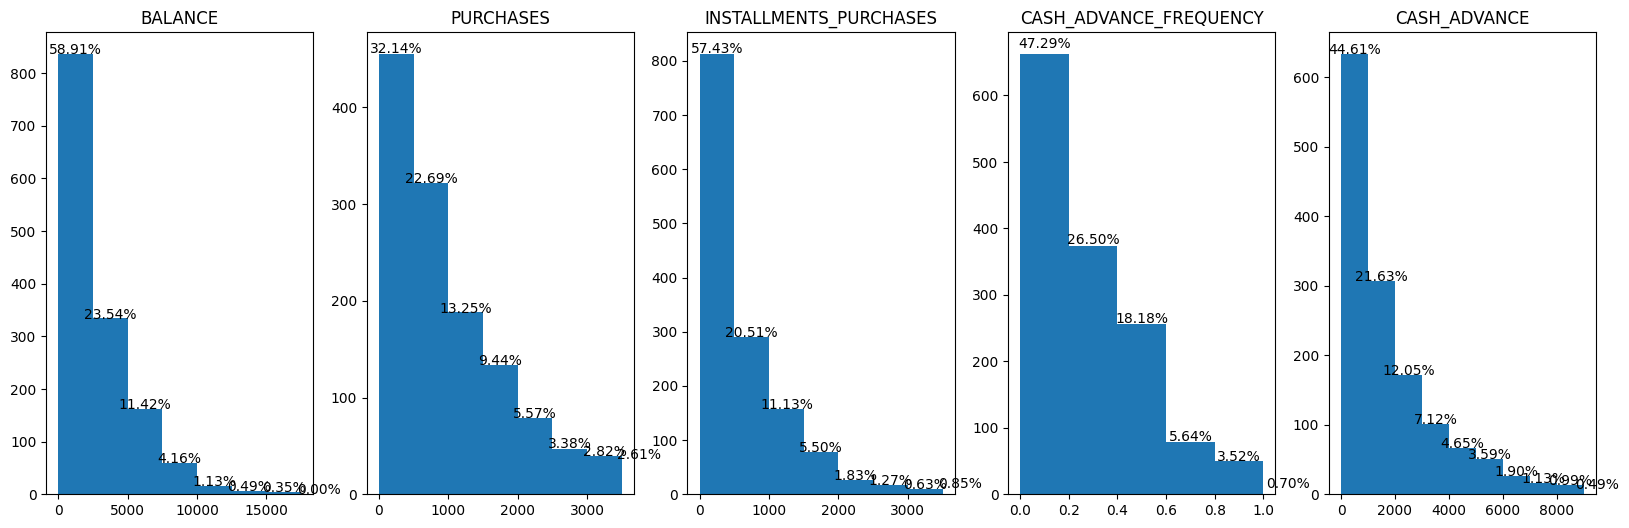

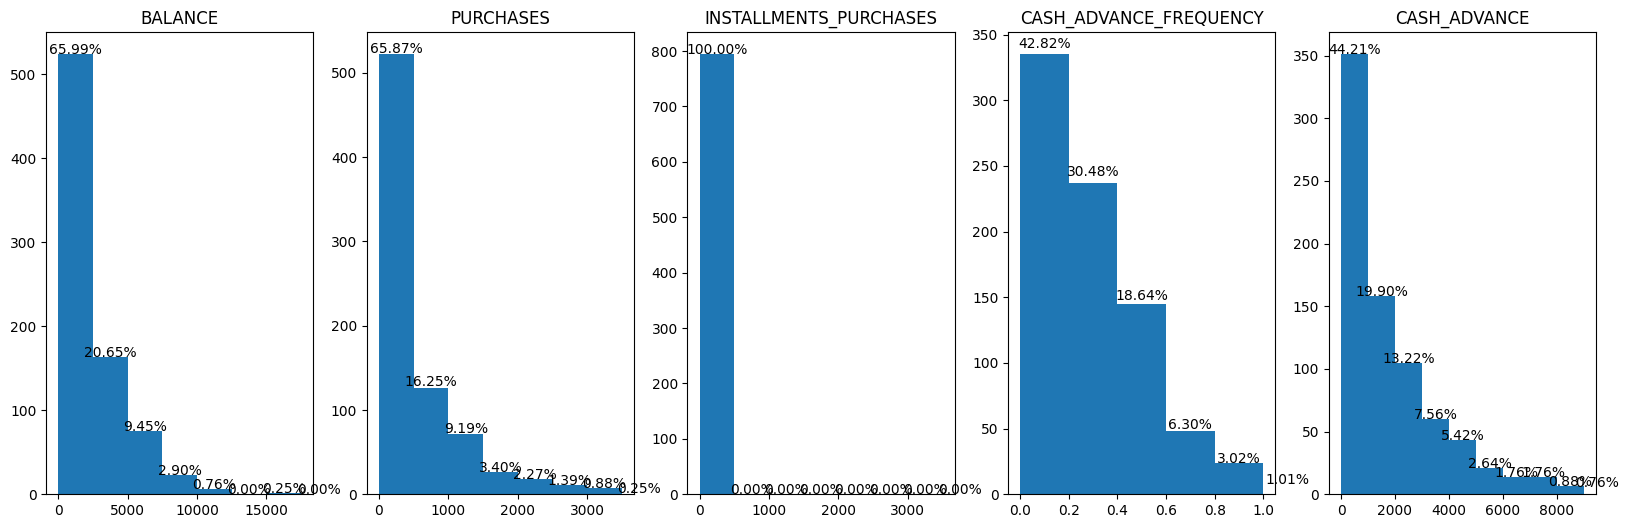

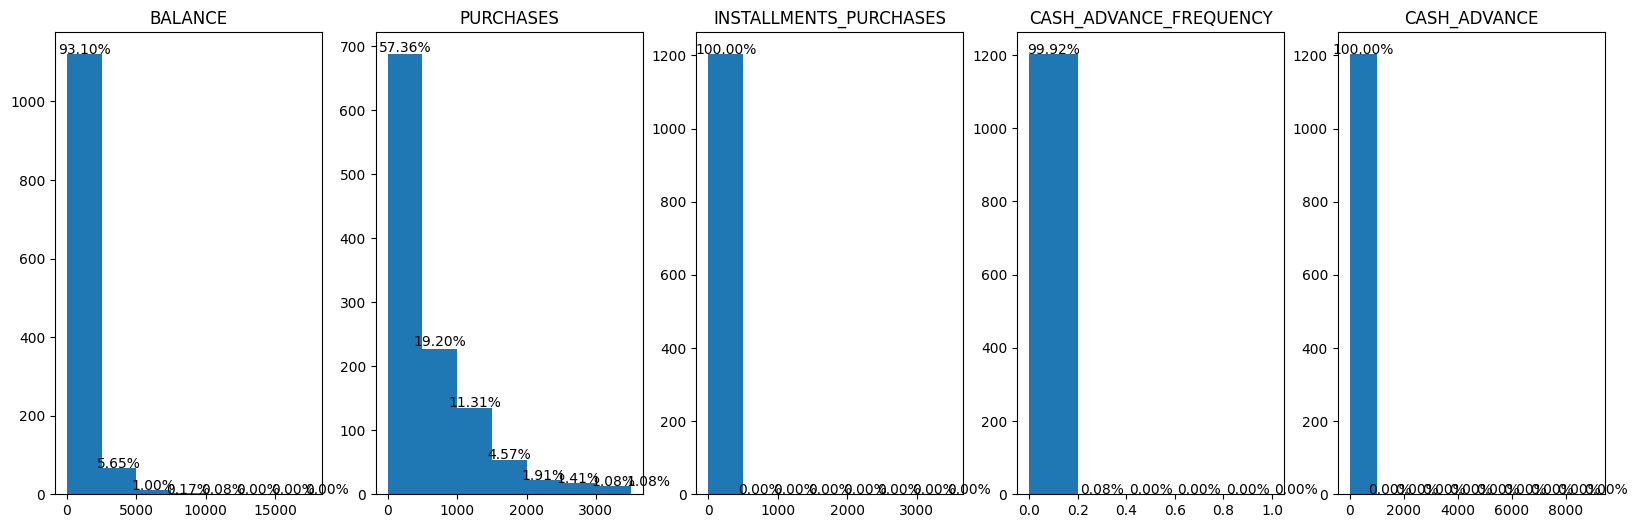

In [77]:
# get business meaning of clusters
final_df = df.copy().drop('CUST_ID', axis=1)

final_df['cluster'] = kmeans.predict(data_normalized_log)

columns = ['BALANCE', 'PURCHASES', 'INSTALLMENTS_PURCHASES','CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE']

bins = {
    'BALANCE': {'bins': [0, 2500, 5000, 7500, 10000, 12500, 15000, 17500], 'step': 2500},
    'PURCHASES': {'bins': [0, 500, 1000, 1500, 2000, 2500, 3000, 3500], 'step': 500},
    'INSTALLMENTS_PURCHASES': {'bins': [0, 500, 1000, 1500, 2000, 2500, 3000, 3500], 'step': 500},
    'CASH_ADVANCE_FREQUENCY': {'bins': [0, 0.2, 0.4, 0.6, 0.8, 1], 'step': 0.2},
    'CASH_ADVANCE': {'bins': np.arange(0, 10000, 1000), 'step': 1000}
}

# draw the hist for each column in each cluster and make sure that every distribution for cluster is in the same horizontal graph (use subplots)
# add the percentage of each bin in the histogram as text on the top of the bin and in the middle of the bin


for i in range(5):
    fig, axs = plt.subplots(1, len(columns), figsize=(20, 6))
    cluster_df = final_df[final_df['cluster'] == i]
    for j, col in enumerate(columns):
        bins_list = bins[col]['bins']
        step = bins[col]['step']
        axs[j].hist(cluster_df[col], bins=bins_list)
        for bin in bins_list:
            count = cluster_df[cluster_df[col].between(bin, bin+step)][col].count()
            percent = count*100/cluster_df.shape[0]
            axs[j].text(bin+step/2, count, f'{percent:.2f}%', ha='center')
        axs[j].set_title(col)
    plt.show()

In [73]:
final_df.groupby('cluster').median()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,208.039434,1.0,685.00,23.65,423.62,0.000000,0.916667,0.083333,0.750000,0.00,0.0,13.0,3000.0,764.604043,181.434904,0.083333,12.0
1,1450.959629,1.0,0.00,0.00,0.00,1194.995991,0.000000,0.000000,0.000000,0.25,4.0,0.0,3000.0,755.520686,484.066784,0.000000,12.0
2,1931.873900,1.0,892.30,255.32,422.92,1176.894248,0.833333,0.166667,0.666667,0.25,4.0,16.0,4500.0,1577.510657,792.902894,0.000000,12.0
3,1685.825325,1.0,294.13,294.13,0.00,1189.892571,0.166667,0.166667,0.000000,0.25,5.0,3.0,3500.0,1110.827004,570.745260,0.000000,12.0
4,212.282538,1.0,373.44,373.44,0.00,0.000000,0.181818,0.166667,0.000000,0.00,0.0,3.0,3000.0,541.219580,192.075716,0.000000,12.0


In [74]:
final_df.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,810.561925,0.870496,1529.413151,763.440752,766.510037,0.373555,0.775794,0.232823,0.675360,0.000651,0.007495,23.613145,4400.681811,1527.322502,670.417461,0.286981,11.655232
1,2145.430491,0.882337,0.091511,0.080034,0.053584,1991.158947,0.001944,0.001258,0.000726,0.271932,6.275061,0.024697,4023.917959,1655.114621,1001.934861,0.044063,11.321550
2,2804.953627,0.967401,1537.027576,821.392882,715.860916,2109.121651,0.749636,0.276585,0.631985,0.286571,7.410853,25.339676,5418.154412,2715.448336,1316.748146,0.061285,11.529246
3,2397.273961,0.931204,662.599194,662.081020,0.920781,2083.327694,0.277367,0.273163,0.004570,0.298956,6.997481,6.269521,4673.519579,1978.477560,1074.632125,0.054165,11.324937
4,728.372156,0.746199,802.838055,800.103408,2.812727,0.707862,0.340340,0.326160,0.014109,0.001438,0.017456,7.275977,4364.389531,1139.993059,484.791117,0.132376,11.568579


There are 5 clusters in the data. The clusters are as follows:

Cluster 0: Customers with a low balance but frequent purchases, preferring installment payments over cash.

Cluster 1: Customers with a moderate balance and no purchases or cash advances, Probably inactive.

Cluster 2: Users with a high balance and moderate purchases.

Cluster 3: Customers with a moderate balance and low purchases, making one-off purchases without installment payments or cash advances.

Cluster 4: Users with a low balance and moderate purchases, making one-off purchases without installment payments or cash advances.